In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
# biến đổi thành all để có thể hiển thị hết tất cả các biểu thức
# ví dụ như có 2 biểu thứ thì hiển thị hết thay vì chỉ hiển thị 1 biểu thức cuối

## Import library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [3]:
df_train = pd.read_csv('train-spaceship.csv')
df_test  = pd.read_csv('test-spaceship.csv')

df_train_no_change = df_train.copy(deep = True)
data_cleaner = [df_train_no_change, df_test]
# deep = true cho phép copy data đó vào df_train_no_change
# tạo ra data_cleaner với hai df_train_no_change và df_test. ,khi tác động lên cleaner thì sẽ tác động lên 2 data đó

In [4]:
df_train.head()
df_train.info()
df_test.head()
df_test.info()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


<h2> Các đối tượng thiếu trong train{HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name}</h2>
<h2>Các đối tượng thiếu trong test{HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, FoodCourt, ShoppingMall, Spa, Name}</h2>eck
Name

In [5]:
# Duplicates:số data trùng lặp
#chuyển sang tỉ lệ phần trăm cho sự trùng lặp cho cả train và test ,đến số thập phân thứ 1
print(f'Duplicates in train set: {df_train.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train),1)}%)')
print('')
print(f'Duplicates in test set: {df_test.duplicated().sum()}, ({np.round(100*df_test.duplicated().sum()/len(df_test),1)}%)')

Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


In [6]:
#hiển thị thông tin data thiếu
#print("-"*10) chỉ là dấu phân chia
print('Train columns with null values:\n', df_train_no_change.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', df_test.isnull().sum())
print("-"*10)

df_train.describe(include = 'all')
#mô tả về train

Train columns with null values:
 PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
----------


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [7]:
df_train.nunique()
#chỉ ra số các giá trị duy nhất trong mỗi cột

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [8]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [9]:
# Expenditure features:list liên quan đến chi tiêu
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Categorical features:có giá trị giúp phân loại hành khách
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Qualitative features:dùng để định danh khách hàng
qual_feats=['PassengerId', 'Cabin' ,'Name']

## Clear Data

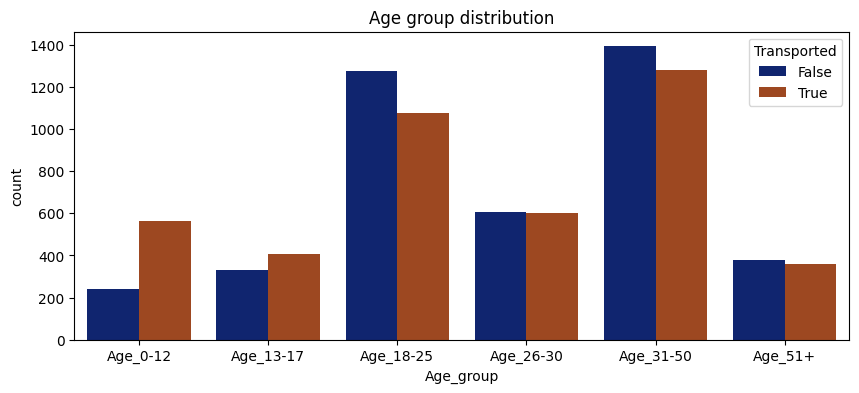

In [10]:
for dataset in data_cleaner:
    dataset['Age_group']=np.nan
    dataset.loc[dataset['Age']<=12,'Age_group']='Age_0-12'
    dataset.loc[(dataset['Age']>12) & (dataset['Age']<18),'Age_group']='Age_13-17'
    dataset.loc[(dataset['Age']>=18) & (dataset['Age']<=25),'Age_group']='Age_18-25'
    dataset.loc[(dataset['Age']>25) & (dataset['Age']<=30),'Age_group']='Age_26-30'
    dataset.loc[(dataset['Age']>30) & (dataset['Age']<=50),'Age_group']='Age_31-50'
    dataset.loc[dataset['Age']>50,'Age_group']='Age_51+'
# #lặp qua data_cleaner ,sau đó tạo cột Age_group có giá trị ban đầu là nan sau đó mới định hình các khoảng giá trị cho nó
plt.figure(figsize=(10,4))
g=sns.countplot(data=df_train_no_change, x='Age_group',  hue='Transported', palette='dark', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution');


In [11]:
dataset['Age_group'] = dataset['Age_group'].astype(str)


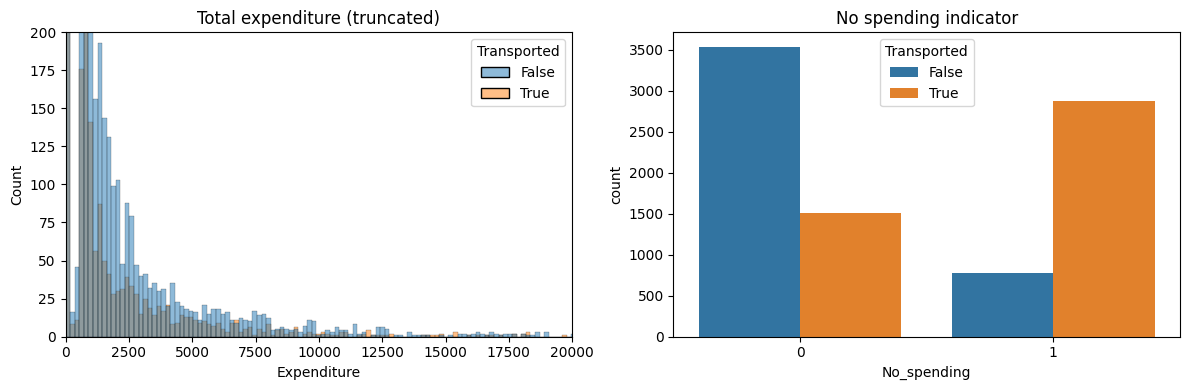

In [12]:
for dataset in data_cleaner:
    dataset['Expenditure']=dataset[exp_feats].sum(axis=1)
    dataset['No_spending']=(dataset['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df_train_no_change, x='Expenditure', hue='Transported', bins=200)
plt.title('Total expenditure (truncated)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=df_train_no_change, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout();


# for dataset in data_cleaner:
#   dataset['Age_group']=np.nan
#   dataset.loc[dataset['Age']<=12,'Age_group']='Age_0-12'
#   dataset.loc[(dataset['Age']>12) & (dataset['Age']<18),'Age_group']='Age_13-17'
#   dataset.loc[(dataset['Age']>=18) & (dataset['Age']<=25),'Age_group']='Age_18-25'
#   dataset.loc[(dataset['Age']>25) & (dataset['Age']<=30),'Age_group']='Age_26-30'
#   dataset.loc[(dataset['Age']>30) & (dataset['Age']<=50),'Age_group']='Age_31-50'
#   dataset.loc[dataset['Age']>50,'Age_group']='Age_51+'

# # Plot distribution of new features
# fig=plt.figure(figsize=(12,4))
# plt.subplot(1,2,1)
# sns.histplot(data=df_train_no_change, x='Expenditure', hue='Transported', bins=200)
# plt.title('Total expenditure (truncated)')
# plt.ylim([0,200])
# plt.xlim([0,20000])

# plt.subplot(1,2,2)
# sns.countplot(data=df_train_no_change, x='No_spending', hue='Transported')
# plt.title('No spending indicator')
# fig.tight_layout();

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


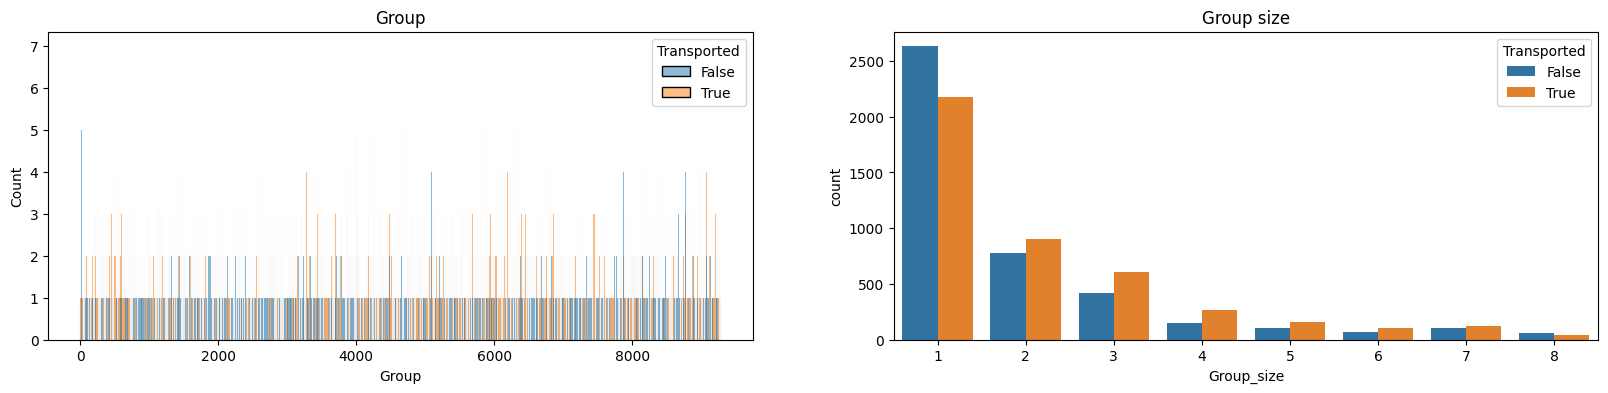

In [13]:
for dataset in data_cleaner:
    dataset['Group'] = dataset['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
    dataset['Group_size']=dataset['Group'].map(lambda x: dataset['Group'].value_counts()[x])

# Plot distribution of new features
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=df_train_no_change, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=df_train_no_change, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout();

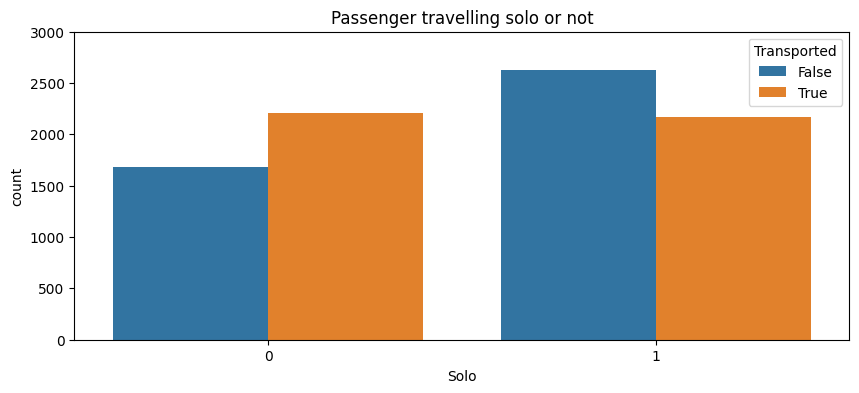

In [14]:
'''
We can't really use the Group feature in our models because it has too big of a cardinality (6217) and
would explode the number of dimensions with one-hot encoding.

The Group size on the other hand should be a useful feature. In fact, we can compress the feature further by
creating a 'Solo' column that tracks whether someone is travelling on their own or not. The figure on the right
shows that group size=1 is less likely to be transported than group size>1.
'''


# # New feature
# df_train['Solo']=(df_train['Group_size']==1).astype(int)
# df_test['Solo']=(df_test['Group_size']==1).astype(int)

for dataset in data_cleaner:
    dataset['Solo']=(dataset['Group_size']==1).astype(int)


# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=df_train_no_change, x='Solo', hue='Transported')
plt.title('Passenger travelling solo or not')
plt.ylim([0,3000]);

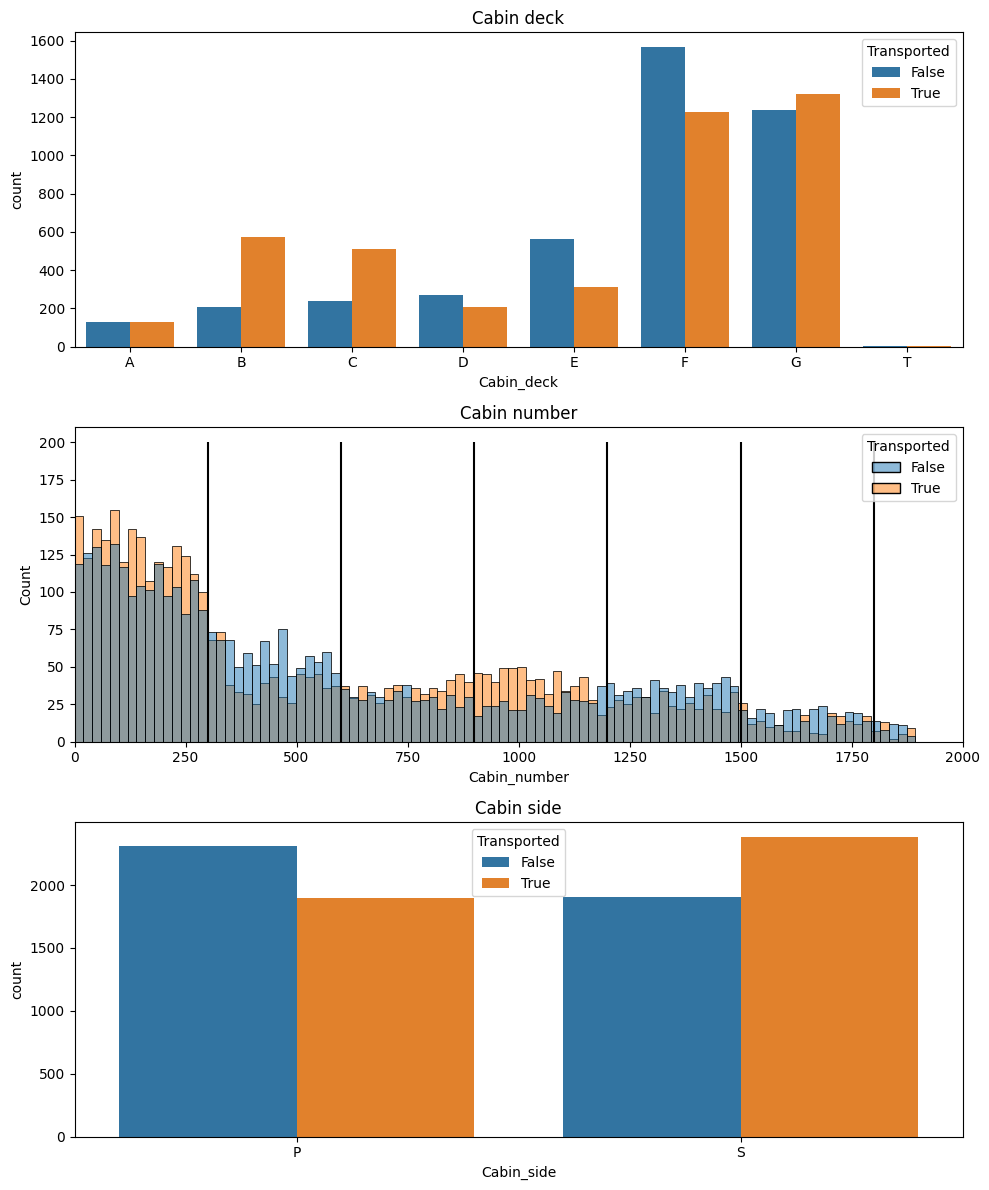

In [15]:
for dataset in data_cleaner:
    # Replace NaN's with outliers for now (so we can split feature)
    dataset['Cabin'].fillna('Z/9999/Z', inplace=True)
    # New features
    dataset['Cabin_deck'] = dataset['Cabin'].apply(lambda x: x.split('/')[0])
    dataset['Cabin_number'] = dataset['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    dataset['Cabin_side'] = dataset['Cabin'].apply(lambda x: x.split('/')[2])

    # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Cabin_deck']=='Z', 'Cabin_deck']=np.nan
    dataset.loc[dataset['Cabin_number']==9999, 'Cabin_number']=np.nan
    dataset.loc[dataset['Cabin_side']=='Z', 'Cabin_side']=np.nan

    # Drop Cabin (we don't need it anymore)
    dataset.drop('Cabin', axis=1, inplace=True)


# Plot distribution of new features
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=df_train_no_change, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=df_train_no_change, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=df_train_no_change, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout();

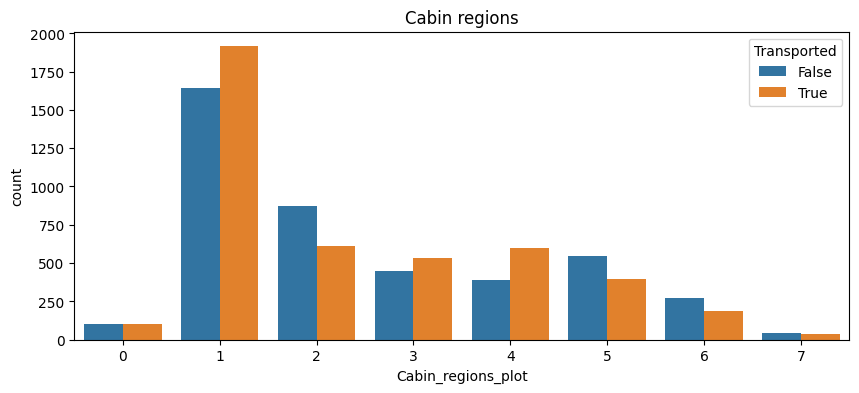

In [16]:
for dataset in data_cleaner:
    # New features - training set
    dataset['Cabin_region1']=(dataset['Cabin_number']<300).astype(int)   # one-hot encoding
    dataset['Cabin_region2']=((dataset['Cabin_number']>=300) & (dataset['Cabin_number']<600)).astype(int)
    dataset['Cabin_region3']=((dataset['Cabin_number']>=600) & (dataset['Cabin_number']<900)).astype(int)
    dataset['Cabin_region4']=((dataset['Cabin_number']>=900) & (dataset['Cabin_number']<1200)).astype(int)
    dataset['Cabin_region5']=((dataset['Cabin_number']>=1200) & (dataset['Cabin_number']<1500)).astype(int)
    dataset['Cabin_region6']=((dataset['Cabin_number']>=1500) & (dataset['Cabin_number']<1800)).astype(int)
    dataset['Cabin_region7']=(dataset['Cabin_number']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
df_train_no_change['Cabin_regions_plot']=(df_train_no_change['Cabin_region1']+2*df_train_no_change['Cabin_region2']+3*df_train_no_change['Cabin_region3']+4*df_train_no_change['Cabin_region4']+5*df_train_no_change['Cabin_region5']+6*df_train_no_change['Cabin_region6']+7*df_train_no_change['Cabin_region7']).astype(int)
sns.countplot(data=df_train_no_change, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
df_train_no_change.drop('Cabin_regions_plot', axis=1, inplace=True);

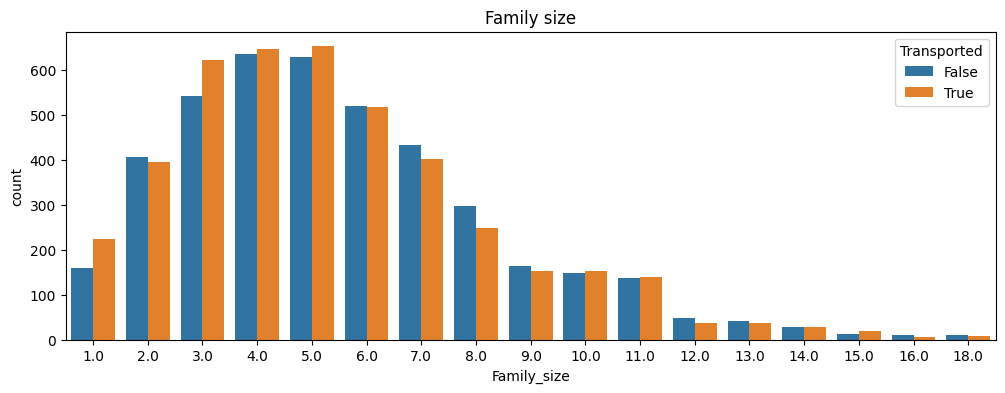

In [17]:
for dataset in data_cleaner:
    # Calculate family size from last name.
    # Replace NaN's with outliers for now (so we can split feature)
    dataset['Name'].fillna('Unknown Unknown', inplace=True)
    # New feature - Surname
    dataset['Surname']=dataset['Name'].str.split().str[-1]
    # New feature - Family size
    dataset['Family_size']=dataset['Surname'].map(lambda x: dataset['Surname'].value_counts()[x])
    # Put Nan's back in (we will fill these later)
    dataset.loc[dataset['Surname']=='Unknown','Surname']=np.nan
    dataset.loc[dataset['Family_size']>100,'Family_size']=np.nan
    # Drop name (we don't need it anymore)
    dataset.drop('Name', axis=1, inplace=True)

# New feature distribution
plt.figure(figsize=(12,4))
sns.countplot(data=df_train_no_change, x='Family_size', hue='Transported')
plt.title('Family size');

## Missing values

In [18]:
df_train_no_change['Transported'].astype(int)

for dataset in data_cleaner:
    # Columns with missing values
    na_cols=dataset.columns[dataset.isna().any()].tolist()
    mv=pd.DataFrame(dataset[na_cols].isna().sum(), columns=['Number_missing'])
    mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(dataset),2)
    print(mv, '\n')

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

              Number_missing  Percentage_missing
HomePlanet               201                2.31
CryoSleep                217                2.50
Destination              182                2.09
Age                      179                2.06
VIP                      203                2.34
RoomService              181                2.08
FoodCourt                183                2.11
ShoppingMall             208                2.39
Spa                      183                2.11
VRDeck                   188                2.16
Age_group                179                2.06
Cabin_deck               199                2.29
Cabin_number             199                2.29
Cabin_side               199                2.29
Surname                  200                2.30
Family_size              200                2.30 

              Number_missing  Percentage_missing
HomePlanet                87                2.03
CryoSleep                 93                2.17
Destination       

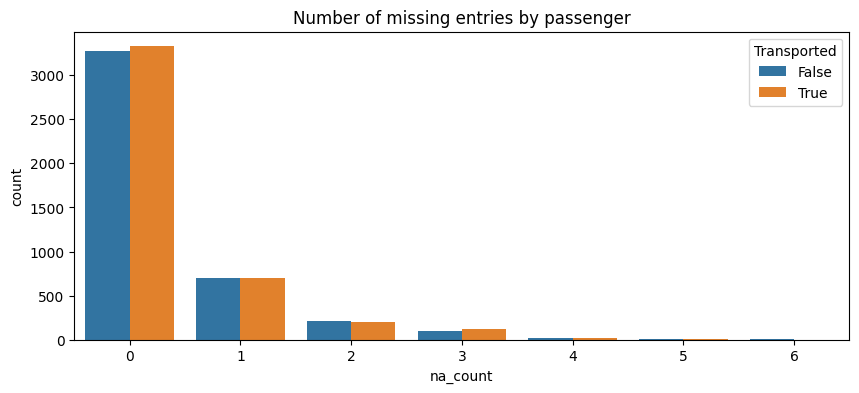

In [19]:
# Countplot of number of missing values by passenger
df_train_no_change['na_count']=df_train_no_change.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=df_train_no_change, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
df_train_no_change.drop('na_count', axis=1, inplace=True);

In [20]:
for dataset in data_cleaner:
    GHP_gb=dataset.groupby(['Group','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum()

    # Passengers with missing HomePlanet and in a group with known HomePlanet
    GHP_index=dataset[dataset['HomePlanet'].isna()][(dataset[dataset['HomePlanet'].isna()]['Group']).isin(GHP_gb.index)].index

    # Fill corresponding missing values
    dataset.loc[GHP_index,'HomePlanet']=dataset.iloc[GHP_index,:]['Group'].map(lambda x: GHP_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

# We managed to fill 131 values with 100% confidence but we are not finished yet.

#HomePlanet missing values before: 201
#HomePlanet missing values after: 111
#HomePlanet missing values before: 87
#HomePlanet missing values after: 46


In [21]:
'''
Notes:

Passengers on decks A, B, C or T came from Europa.
Passengers on deck G came from Earth.
Passengers on decks D, E or F came from multiple planets.
'''

for dataset in data_cleaner:
    # Missing values before
    HP_bef=dataset['HomePlanet'].isna().sum()

    # Decks A, B, C or T came from Europa
    dataset.loc[(dataset['HomePlanet'].isna()) & (dataset['Cabin_deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

    # Deck G came from Earth
    dataset.loc[(dataset['HomePlanet'].isna()) & (dataset['Cabin_deck']=='G'), 'HomePlanet']='Earth'

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',dataset['HomePlanet'].isna().sum())

'\nNotes:\n\nPassengers on decks A, B, C or T came from Europa.\nPassengers on deck G came from Earth.\nPassengers on decks D, E or F came from multiple planets.\n'

#HomePlanet missing values before: 111
#HomePlanet missing values after: 63
#HomePlanet missing values before: 46
#HomePlanet missing values after: 31


In [22]:
for data in data_cleaner:
    SHP_gb=data.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
    #  Everyone with the same surname comes from the same home planet.
    # Missing values before
    HP_bef=data['HomePlanet'].isna().sum()

    # Passengers with missing HomePlanet and in a family with known HomePlanet
    SHP_index=data[data['HomePlanet'].isna()][(data[data['HomePlanet'].isna()]['Surname']).isin(SHP_gb.index)].index

    # Fill corresponding missing values
    data.loc[SHP_index,'HomePlanet']=data.iloc[SHP_index,:]['Surname'].map(lambda x: SHP_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

#HomePlanet missing values before: 63
#HomePlanet missing values after: 8
#HomePlanet missing values before: 31
#HomePlanet missing values after: 11


In [23]:
for data in data_cleaner:
    # Missing values before
    HP_bef=data['HomePlanet'].isna().sum()

    # Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
    data.loc[(data['HomePlanet'].isna()) & ~(data['Cabin_deck']=='D'), 'HomePlanet']='Earth'
    data.loc[(data['HomePlanet'].isna()) & (data['Cabin_deck']=='D'), 'HomePlanet']='Mars'

    # Print number of missing values left
    print('#HomePlanet missing values before:',HP_bef)
    print('#HomePlanet missing values after:',data['HomePlanet'].isna().sum())

# We're done with HomePlanet.

#HomePlanet missing values before: 8
#HomePlanet missing values after: 0
#HomePlanet missing values before: 11
#HomePlanet missing values after: 0


In [24]:
for data in data_cleaner:
    # Missing values before
    D_bef=data['Destination'].isna().sum()

    # Fill missing Destination values with mode
    data.loc[(data['Destination'].isna()), 'Destination']='TRAPPIST-1e'

    # Print number of missing values left
    print('#Destination missing values before:',D_bef)
    print('#Destination missing values after:',data['Destination'].isna().sum())

#Destination missing values before: 182
#Destination missing values after: 0
#Destination missing values before: 92
#Destination missing values after: 0


In [25]:
for data in data_cleaner:
    # Joint distribution of Group and Surname
    GSN_gb=data[data['Group_size']>1].groupby(['Group','Surname'])['Surname'].size().unstack().fillna(0)

    # The majority (83%) of groups contain only 1 family. So let's fill missing surnames according to the majority surname in that group.
    # Missing values before
    SN_bef=data['Surname'].isna().sum()

    # Passengers with missing Surname and in a group with known majority Surname
    GSN_index=data[data['Surname'].isna()][(data[data['Surname'].isna()]['Group']).isin(GSN_gb.index)].index

    # Fill corresponding missing values
    data.loc[GSN_index,'Surname']=data.iloc[GSN_index,:]['Group'].map(lambda x: GSN_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Surname missing values before:',SN_bef)
    print('#Surname missing values after:',data['Surname'].isna().sum())

    # Replace NaN's with outliers (so we can use map)
    data['Surname'].fillna('Unknown', inplace=True)

    # Update family size feature
    data['Family_size']=data['Surname'].map(lambda x: data['Surname'].value_counts()[x])

    # Put NaN's back in place of outliers
    data.loc[data['Surname']=='Unknown','Surname']=np.nan

    # Say unknown surname means no family
    data.loc[data['Family_size']>100,'Family_size']=0

#Surname missing values before: 200
#Surname missing values after: 104
#Surname missing values before: 94
#Surname missing values after: 51


In [26]:
for data in data_cleaner:
    # Joint distribution of Group and Cabin features
    GCD_gb=data[data['Group_size']>1].groupby(['Group','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
    GCN_gb=data[data['Group_size']>1].groupby(['Group','Cabin_number'])['Cabin_number'].size().unstack().fillna(0)
    GCS_gb=data[data['Group_size']>1].groupby(['Group','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

    # Everyone in the same group is also on the same cabin side. For cabin deck and cabin number there is also a fairly good (but not perfect) correlation with group.
    # Missing values before
    CS_bef=data['Cabin_side'].isna().sum()

    # Passengers with missing Cabin side and in a group with known Cabin side
    GCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Group']).isin(GCS_gb.index)].index

    # Fill corresponding missing values
    data.loc[GCS_index,'Cabin_side']=data.iloc[GCS_index,:]['Group'].map(lambda x: GCS_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 199
#Cabin_side missing values after: 99
#Cabin_side missing values before: 100
#Cabin_side missing values after: 63


<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Ratio', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of cabin side by surname')

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Ratio', ylabel='Count'>

Text(0.5, 1.0, 'Ratio of cabin side by surname')

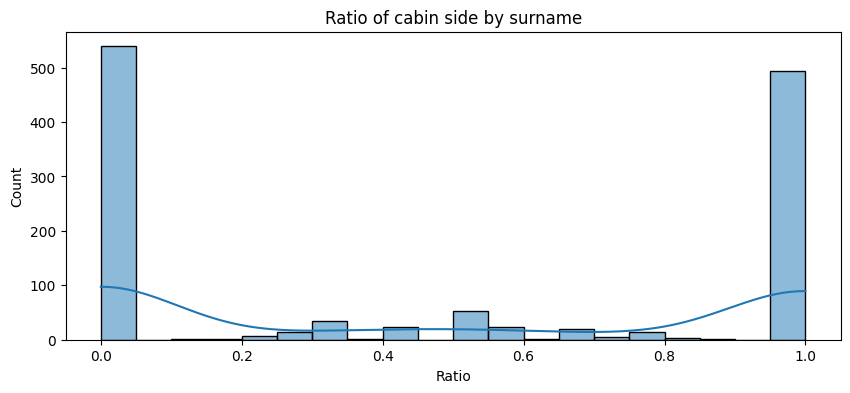

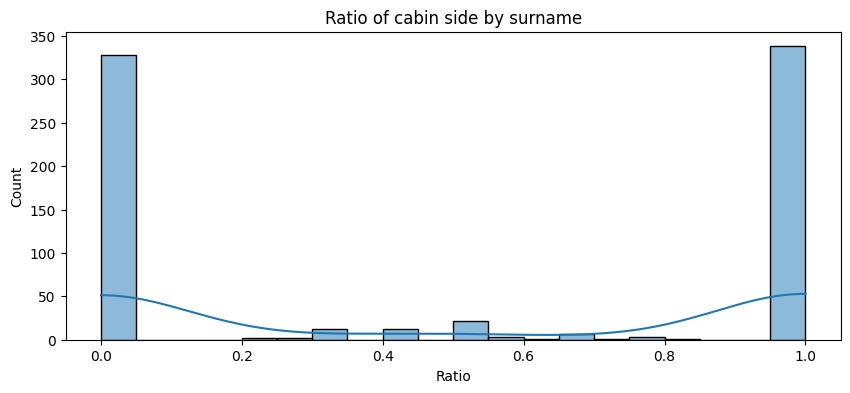

In [27]:
for data in data_cleaner:
    # Joint distribution of Surname and Cabin side
    SCS_gb=data[data['Group_size']>1].groupby(['Surname','Cabin_side'])['Cabin_side'].size().unstack().fillna(0)

    # Ratio of sides
    SCS_gb['Ratio']=SCS_gb['P']/(SCS_gb['P']+SCS_gb['S'])

    # Histogram of ratio
    plt.figure(figsize=(10,4))
    sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
    plt.title('Ratio of cabin side by surname');

In [28]:
# Print proportion
print('Percentage of families all on the same cabin side:', 100*np.round((SCS_gb['Ratio'].isin([0,1])).sum()/len(SCS_gb),3),'%')

# Another view of the same information
SCS_gb.head()

Percentage of families all on the same cabin side: 91.0 %


Cabin_side,P,S,Ratio
Surname,,,
Acobsond,3.0,0.0,1.0
Aginge,3.0,0.0,1.0
Aillyber,3.0,0.0,1.0
Aindlylid,0.0,1.0,0.0
Airdring,0.0,2.0,0.0


In [29]:
# Missing values before
CS_bef=data['Cabin_side'].isna().sum()

# Drop ratio column
SCS_gb.drop('Ratio', axis=1, inplace=True)

for data in data_cleaner:
    # Passengers with missing Cabin side and in a family with known Cabin side
    SCS_index=data[data['Cabin_side'].isna()][(data[data['Cabin_side'].isna()]['Surname']).isin(SCS_gb.index)].index

    # Fill corresponding missing values
    data.loc[SCS_index,'Cabin_side']=data.iloc[SCS_index,:]['Surname'].map(lambda x: SCS_gb.idxmax(axis=1)[x])

    # Drop surname (we don't need it anymore)
    data.drop('Surname', axis=1, inplace=True)

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

#Cabin_side missing values before: 63
#Cabin_side missing values after: 74
#Cabin_side missing values before: 63
#Cabin_side missing values after: 45


In [30]:
for data in data_cleaner:
    # Value counts
    data['Cabin_side'].value_counts()

    # Missing values before
    CS_bef=data['Cabin_side'].isna().sum()

    # Fill remaining missing values with outlier
    data.loc[data['Cabin_side'].isna(),'Cabin_side']='Z'

    # Print number of missing values left
    print('#Cabin_side missing values before:',CS_bef)
    print('#Cabin_side missing values after:',data['Cabin_side'].isna().sum())

S    4356
P    4263
Name: Cabin_side, dtype: int64

#Cabin_side missing values before: 74
#Cabin_side missing values after: 0


S    2119
P    2113
Name: Cabin_side, dtype: int64

#Cabin_side missing values before: 45
#Cabin_side missing values after: 0


In [31]:
for data in data_cleaner:
    # Missing values before
    CD_bef=data['Cabin_deck'].isna().sum()

    # Passengers with missing Cabin deck and in a group with known majority Cabin deck
    GCD_index=data[data['Cabin_deck'].isna()][(data[data['Cabin_deck'].isna()]['Group']).isin(GCD_gb.index)].index

    # Fill corresponding missing values
    data.loc[GCD_index,'Cabin_deck']=data.iloc[GCD_index,:]['Group'].map(lambda x: GCD_gb.idxmax(axis=1)[x])

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 199
#Cabin_deck missing values before: 100
#Cabin_deck missing values after: 63


In [32]:
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','Destination','Solo','Cabin_deck'])['Cabin_deck'].size().unstack().fillna(0)
    '''
    Passengers from Mars are most likely in deck F.
    Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.
    Passengers from Earth are (more or less) most likely in deck G.
    We will fill in missing values according to where the mode appears in these subgroups.
    '''
    # Missing values before
    CD_bef=data['Cabin_deck'].isna().sum()

    # Fill missing values using the mode
    na_rows_CD=data.loc[data['Cabin_deck'].isna(),'Cabin_deck'].index
    data.loc[data['Cabin_deck'].isna(),'Cabin_deck']=data.groupby(['HomePlanet','Destination','Solo'])['Cabin_deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

    # Print number of missing values left
    print('#Cabin_deck missing values before:',CD_bef)
    print('#Cabin_deck missing values after:',data['Cabin_deck'].isna().sum())

Cabin_deck                         A      B      C      D      E      F  \
HomePlanet Destination   Solo                                             
Earth      55 Cancri e   0       0.0    0.0    0.0    0.0   13.0   67.0   
                         1       0.0    0.0    0.0    0.0   34.0  205.0   
           PSO J318.5-22 0       0.0    0.0    0.0    0.0   12.0   41.0   
                         1       0.0    0.0    0.0    0.0   16.0  180.0   
           TRAPPIST-1e   0       0.0    0.0    0.0    0.0   87.0  278.0   
                         1       0.0    0.0    0.0    0.0  242.0  881.0   
Europa     55 Cancri e   0      62.0  231.0  212.0   36.0   24.0    0.0   
                         1      46.0  102.0  105.0   30.0   24.0    0.0   
           PSO J318.5-22 0       2.0    3.0    4.0    0.0    0.0    0.0   
                         1       0.0    0.0    9.0    0.0    0.0    0.0   
           TRAPPIST-1e   0     111.0  317.0  274.0   70.0   35.0    0.0   
                         1      35.0  126.0  143.0   56.0   50.0    0.0   
Mars       55 Cancri e   0       0.0    0.0    0.0   20.0   11.0   68.0   
                         1       0.0    0.0    0.0   27.0   10.0   58.0   
           PSO J318.5-22 0       0.0    0.0    0.0    8.0    7.0    9.0   
                         1       0.0    0.0    0.0    9.0    6.0   11.0   
           TRAPPIST-1e   0       0.0    0.0    0.0  112.0  131.0  516.0   
                         1       0.0    0.0    0.0  110.0  174.0  480.0   

Cabin_deck                          G    T  
HomePlanet Destination   Solo               
Earth      55 Cancri e   0      182.0  0.0  
                         1      183.0  0.0  
           PSO J318.5-22 0      145.0  0.0  
                         1      316.0  0.0  
           TRAPPIST-1e   0      700.0  0.0  
                         1     1033.0  0.0  
Europa     55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  5.0  
Mars       55 Cancri e   0        0.0  0.0  
                         1        0.0  0.0  
           PSO J318.5-22 0        0.0  0.0  
                         1        0.0  0.0  
           TRAPPIST-1e   0        0.0  0.0  
                         1        0.0  0.0

'\n    Passengers from Mars are most likely in deck F.\n    Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.\n    Passengers from Earth are (more or less) most likely in deck G.\n    We will fill in missing values according to where the mode appears in these subgroups.\n    '

#Cabin_deck missing values before: 199
#Cabin_deck missing values after: 0


Cabin_deck                        A      B      C     D      E      F      G  \
HomePlanet Destination   Solo                                                  
Earth      55 Cancri e   0      0.0    0.0    0.0   0.0    7.0   22.0   83.0   
                         1      0.0    0.0    0.0   0.0   13.0   85.0   86.0   
           PSO J318.5-22 0      0.0    0.0    0.0   0.0    5.0   25.0   83.0   
                         1      0.0    0.0    0.0   0.0    9.0   82.0  150.0   
           TRAPPIST-1e   0      0.0    0.0    0.0   0.0   44.0  153.0  355.0   
                         1      0.0    0.0    0.0   0.0  117.0  472.0  476.0   
Europa     55 Cancri e   0     29.0  136.0   96.0  22.0   10.0    0.0    0.0   
                         1     21.0   39.0   54.0  16.0   10.0    0.0    0.0   
           PSO J318.5-22 0      0.0    2.0    6.0   0.0    0.0    0.0    0.0   
                         1      0.0    0.0    1.0   0.0    0.0    0.0    0.0   
           TRAPPIST-1e   0     40.0  135.0  146.0  48.0   18.0    0.0    0.0   
                         1      9.0   53.0   58.0  28.0   31.0    0.0    0.0   
Mars       55 Cancri e   0      0.0    0.0    0.0  11.0    4.0   36.0    0.0   
                         1      0.0    0.0    0.0  13.0    6.0   33.0    0.0   
           PSO J318.5-22 0      0.0    0.0    0.0   0.0    2.0    5.0    0.0   
                         1      0.0    0.0    0.0   0.0    1.0   10.0    0.0   
           TRAPPIST-1e   0      0.0    0.0    0.0  51.0   83.0  275.0    0.0   
                         1      0.0    0.0    0.0  54.0   89.0  260.0    0.0   

Cabin_deck                       T  
HomePlanet Destination   Solo       
Earth      55 Cancri e   0     0.0  
                         1     0.0  
           PSO J318.5-22 0     0.0  
                         1     0.0  
           TRAPPIST-1e   0     0.0  
                         1     0.0  
Europa     55 Cancri e   0     2.0  
                         1     0.0  
           PSO J318.5-22 0     0.0  
                         1     0.0  
           TRAPPIST-1e   0     1.0  
                         1     3.0  
Mars       55 Cancri e   0     0.0  
                         1     0.0  
           PSO J318.5-22 0     0.0  
                         1     0.0  
           TRAPPIST-1e   0     0.0  
                         1     0.0

'\n    Passengers from Mars are most likely in deck F.\n    Passengers from Europa are (more or less) most likely in deck C if travelling solo and deck B otherwise.\n    Passengers from Earth are (more or less) most likely in deck G.\n    We will fill in missing values according to where the mode appears in these subgroups.\n    '

#Cabin_deck missing values before: 63
#Cabin_deck missing values after: 0


<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Cabin_number', ylabel='Group'>

Text(0.5, 1.0, 'Cabin_number vs group coloured by group ')

<Figure size 1000x400 with 0 Axes>

<Axes: xlabel='Cabin_number', ylabel='Group'>

Text(0.5, 1.0, 'Cabin_number vs group coloured by group ')

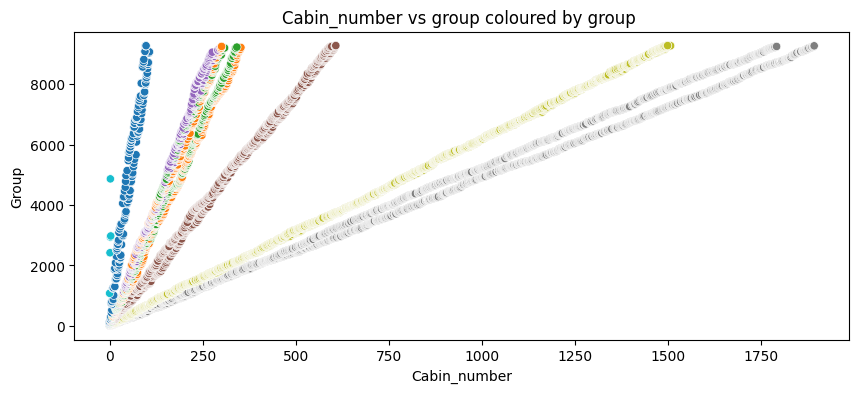

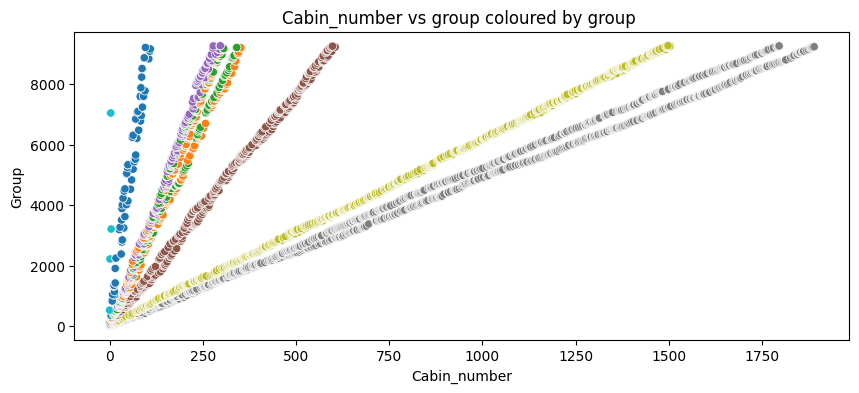

In [33]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
for data in data_cleaner:
    # Scatterplot
    plt.figure(figsize=(10,4))
    sns.scatterplot(x=data['Cabin_number'], y=data['Group'], c=LabelEncoder().fit_transform(data.loc[~data['Cabin_number'].isna(),'Cabin_deck']), cmap='tab10')
    plt.title('Cabin_number vs group coloured by group ');

In [34]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
for data in data_cleaner:
    # Missing values before
    CN_bef=data['Cabin_number'].isna().sum()
    print('#Cabin_number missing values before:',CN_bef)
    # Extrapolate linear relationship on a deck by deck basis
    for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
        # Features and labels
        X_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']
        y_CN=data.loc[~(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']
        X_test_CN=data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Group']

        if not X_test_CN.empty:
            # Linear regression
            model_CN=linear_model.LinearRegression()
            model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
            preds_CN=model_CN.predict(X_test_CN.values.reshape(-1, 1))

            # Fill missing values with predictions
            data.loc[(data['Cabin_number'].isna()) & (data['Cabin_deck']==deck),'Cabin_number']=preds_CN.astype(int)

    # Print number of missing values left
    print('#Cabin_number missing values before:',CN_bef)
    print('#Cabin_number missing values after:',data['Cabin_number'].isna().sum())

    # One-hot encode cabin regions
    data['Cabin_region1']=(data['Cabin_number']<300).astype(int)
    data['Cabin_region2']=((data['Cabin_number']>=300) & (data['Cabin_number']<600)).astype(int)
    data['Cabin_region3']=((data['Cabin_number']>=600) & (data['Cabin_number']<900)).astype(int)
    data['Cabin_region4']=((data['Cabin_number']>=900) & (data['Cabin_number']<1200)).astype(int)
    data['Cabin_region5']=((data['Cabin_number']>=1200) & (data['Cabin_number']<1500)).astype(int)
    data['Cabin_region6']=((data['Cabin_number']>=1500) & (data['Cabin_number']<1800)).astype(int)
    data['Cabin_region7']=(data['Cabin_number']>=1800).astype(int)

#Cabin_number missing values before: 199


LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

#Cabin_number missing values before: 199
#Cabin_number missing values after: 0
#Cabin_number missing values before: 100


LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

#Cabin_number missing values before: 100
#Cabin_number missing values after: 0


In [35]:
for data in data_cleaner:
    # Missing values before
    V_bef=data['VIP'].isna().sum()

    # Fill missing values with mode
    data.loc[data['VIP'].isna(),'VIP']=False

    # Print number of missing values left
    print('#VIP missing values before:',V_bef)
    print('#VIP missing values after:',data['VIP'].isna().sum())

#VIP missing values before: 203
#VIP missing values after: 0
#VIP missing values before: 93
#VIP missing values after: 0


In [36]:
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].median().unstack().fillna(0)
    # Missing values before
    A_bef=data[exp_feats].isna().sum().sum()

    # Fill missing values using the median
    na_rows_A=data.loc[data['Age'].isna(),'Age'].index
    data.loc[data['Age'].isna(),'Age']=data.groupby(['HomePlanet','No_spending','Solo','Cabin_deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

    # Print number of missing values left
    print('#Age missing values before:',A_bef)
    print('#Age missing values after:',data['Age'].isna().sum())

Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  24.0  26.0  28.0   0.0
                       1      0.0   0.0   0.0   0.0  26.0  24.0  27.0   0.0
           1           0      0.0   0.0   0.0   0.0   7.0  15.0   8.0   0.0
                       1      0.0   0.0   0.0   0.0  19.0  23.0  23.0   0.0
Europa     0           0     36.0  34.0  33.0  32.5  32.0   0.0   0.0   0.0
                       1     34.0  37.0  35.5  34.0  36.0   0.0   0.0  37.0
           1           0     29.0  27.0  29.0  30.0  26.0   0.0   0.0   0.0
                       1     31.5  34.0  34.0  31.0  33.5   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  31.0  29.0  29.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  28.5  32.0   0.0   0.0
           1           0      0.0   0.0   0.0  35.0  26.0  18.0   0.0   0.0
                       1      0.0   0.0   0.0  40.0  30.0  29.5   0.0   0.0

#Age missing values before: 943
#Age missing values after: 0


Cabin_deck                      A     B     C     D     E     F     G     T
HomePlanet No_spending Solo                                                
Earth      0           0      0.0   0.0   0.0   0.0  25.0  24.0  27.0   0.0
                       1      0.0   0.0   0.0   0.0  25.0  23.0  25.0   0.0
           1           0      0.0   0.0   0.0   0.0   6.5  14.5   9.0   0.0
                       1      0.0   0.0   0.0   0.0  32.0  21.5  23.0   0.0
Europa     0           0     33.0  33.0  33.0  35.0  36.0   0.0   0.0  44.0
                       1     35.0  34.0  35.5  32.0  35.0   0.0   0.0  27.0
           1           0     31.0  28.0  29.0  26.0  34.5   0.0   0.0   0.0
                       1     42.5  34.5  37.0  32.0  31.0   0.0   0.0   0.0
Mars       0           0      0.0   0.0   0.0  27.0  28.5  29.0   0.0   0.0
                       1      0.0   0.0   0.0  32.5  28.0  28.0   0.0   0.0
           1           0      0.0   0.0   0.0  22.0  27.5  19.0   0.0   0.0
                       1      0.0   0.0   0.0  31.0  30.0  29.0   0.0   0.0

#Age missing values before: 467
#Age missing values after: 0


In [37]:
for data in data_cleaner:
    # Update age group feature
    data.loc[data['Age']<=12,'Age_group']='Age_0-12'
    data.loc[(data['Age']>12) & (data['Age']<18),'Age_group']='Age_13-17'
    data.loc[(data['Age']>=18) & (data['Age']<=25),'Age_group']='Age_18-25'
    data.loc[(data['Age']>25) & (data['Age']<=30),'Age_group']='Age_26-30'
    data.loc[(data['Age']>30) & (data['Age']<=50),'Age_group']='Age_31-50'
    data.loc[data['Age']>50,'Age_group']='Age_51+'

In [38]:
for data in data_cleaner:
    # Joint distribution
    data.groupby(['No_spending','CryoSleep'])['CryoSleep'].size().unstack().fillna(0)
    # Missing values before
    CSL_bef=data['CryoSleep'].isna().sum()

    # Fill missing values using the mode
    na_rows_CSL=data.loc[data['CryoSleep'].isna(),'CryoSleep'].index
    data.loc[data['CryoSleep'].isna(),'CryoSleep']=data.groupby(['No_spending'])['CryoSleep'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

    # Print number of missing values left
    print('#CryoSleep missing values before:',CSL_bef)
    print('#CryoSleep missing values after:',data['CryoSleep'].isna().sum())

CryoSleep,False,True
No_spending,,
0,4921.0,0.0
1,518.0,3037.0


#CryoSleep missing values before: 217
#CryoSleep missing values after: 0


CryoSleep,False,True
No_spending,,
0,2418.0,0.0
1,222.0,1544.0


#CryoSleep missing values before: 93
#CryoSleep missing values after: 0


In [39]:
for data in data_cleaner:
    # Missing values before
    E_bef=data[exp_feats].isna().sum().sum()

    # CryoSleep has no expenditure
    for col in exp_feats:
        data.loc[(data[col].isna()) & (data['CryoSleep']==True), col]=0

    # Print number of missing values left
    print('#Expenditure missing values before:',E_bef)
    print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

#Expenditure missing values before: 943
#Expenditure missing values after: 571
#Expenditure missing values before: 467
#Expenditure missing values after: 295


In [40]:
for data in data_cleaner:
    # Joint distribution
    data.groupby(['HomePlanet','Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)
    # Missing values before
    E_bef=data[exp_feats].isna().sum().sum()

    # Fill remaining missing values using the median
    for col in exp_feats:
        na_rows=data.loc[data[col].isna(),col].index
        data.loc[data[col].isna(),col]=data.groupby(['HomePlanet','Solo','Age_group'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]

    # Print number of missing values left
    print('#Expenditure missing values before:',E_bef)
    print('#Expenditure missing values after:',data[exp_feats].isna().sum().sum())

Age_group        Age_0-12    Age_13-17    Age_18-25    Age_26-30    Age_31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   701.267606   782.694524   893.474820   773.833887   
           1          0.0   634.395604   771.828864   798.491315   810.238210   
Europa     0          0.0  1102.955752  2723.480851  3382.034247  4125.611498   
           1          0.0     0.000000  2332.623529  3636.634146  3984.079692   
Mars       0          0.0  1196.301370  1175.073394  1215.338983  1162.175097   
           1          0.0  1847.150000  1161.883333   977.905325  1162.197260   

Age_group            Age_51+  
HomePlanet Solo               
Earth      0      811.919540  
           1      787.082609  
Europa     0     3507.621951  
           1     3804.560748  
Mars       0     1139.774648  
           1     1130.602564

#Expenditure missing values before: 571
#Expenditure missing values after: 0


Age_group        Age_0-12    Age_13-17    Age_18-25    Age_26-30    Age_31-50  \
HomePlanet Solo                                                                 
Earth      0          0.0   765.337349   802.593583   733.760563   665.829114   
           1          0.0   816.352601   793.968134   795.178161   793.170000   
Europa     0          0.0  1285.093023  2532.900709  3877.507692  3668.607143   
           1          0.0     0.000000  2815.926829  4240.000000  3826.056818   
Mars       0          0.0  1140.410256  1133.461538  1330.700000  1109.585938   
           1          0.0  1431.440000   928.608392  1297.380435  1022.892857   

Age_group            Age_51+  
HomePlanet Solo               
Earth      0      506.666667  
           1      919.515464  
Europa     0     3432.558442  
           1     4302.866667  
Mars       0     1701.536585  
           1     1048.913043

#Expenditure missing values before: 295
#Expenditure missing values after: 0


In [41]:
for data in data_cleaner:
    # Update expenditure and no_spending
    data['Expenditure']=data[exp_feats].sum(axis=1)
    data['No_spending']=(data['Expenditure']==0).astype(int)
    data.isna().sum()
    # Apply log transform
    for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
        data[col]=np.log(1+data[col])

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
Age_group        0
Expenditure      0
No_spending      0
Group            0
Group_size       0
Solo             0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

PassengerId      0
HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Age_group        0
Expenditure      0
No_spending      0
Group            0
Group_size       0
Solo             0
Cabin_deck       0
Cabin_number     0
Cabin_side       0
Cabin_region1    0
Cabin_region2    0
Cabin_region3    0
Cabin_region4    0
Cabin_region5    0
Cabin_region6    0
Cabin_region7    0
Family_size      0
dtype: int64

## Convert Formats

In [42]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()

for data in data_cleaner:

    data['HomePlanet_Code'] = label.fit_transform(data['HomePlanet'])
    data['CryoSleep_Code'] = label.fit_transform(data['CryoSleep'])
    data['Destination_Code'] = label.fit_transform(data['Destination'])
    data['VIP_Code'] = label.fit_transform(data['VIP'])
    data['Age_group_Code'] = label.fit_transform(data['Age_group'])
    data['Cabin_deck_Code'] = label.fit_transform(data['Cabin_deck'])
    data['Cabin_side_Code'] = label.fit_transform(data['Cabin_side'])

In [43]:
# define y variable aka target/outcome
Target = ['Transported']

# define x variables for original features aka feature selection

# 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'
df_train_no_change_x = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] # Original data
# 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Age_group', 'Expenditure', 'No_spending', 'Group', 'Group_size', 'Solo', 'Cabin_deck', 'Cabin_number', 'Cabin_side', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code'

df_train_no_change_x_calc = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure', 'No_spending', 'Group', 'Group_size', 'Solo', 'Cabin_number', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code'] # coded for algorithm calculation
df_train_no_change_xy =  Target + df_train_no_change_x
print('Original X Y: ', df_train_no_change_xy, '\n')


# define x variables for original w/bin features to remove continuous variables
df_train_no_change_x_bin = ['Age', 'No_spending', 'Group_size', 'Solo', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code']
df_train_no_change_xy_bin = Target + df_train_no_change_x_bin
print('Bin X Y: ', df_train_no_change_xy_bin, '\n')


#define x and y variables for dummy features original
df_train_no_change_dummy = pd.get_dummies(df_train_no_change[df_train_no_change_x])
df_train_no_change_x_dummy = df_train_no_change_dummy.columns.tolist()
df_train_no_change_xy_dummy = Target + df_train_no_change_x_dummy
print('Dummy X Y: ', df_train_no_change_xy_dummy, '\n')



df_train_no_change_dummy.head()

Original X Y:  ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 

Bin X Y:  ['Transported', 'Age', 'No_spending', 'Group_size', 'Solo', 'Cabin_region1', 'Cabin_region2', 'Cabin_region3', 'Cabin_region4', 'Cabin_region5', 'Cabin_region6', 'Cabin_region7', 'Family_size', 'HomePlanet_Code', 'CryoSleep_Code', 'Destination_Code', 'VIP_Code', 'Age_group_Code', 'Cabin_deck_Code', 'Cabin_side_Code'] 

Dummy X Y:  ['Transported', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_False', 'CryoSleep_True', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'VIP_False', 'VIP_True'] 



,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,1,0,0,0,1,1,0
1,24.0,4.700480,2.302585,3.258097,6.309918,3.806662,1,0,0,1,0,0,0,1,1,0
2,58.0,3.784190,8.182280,0.000000,8.812248,3.912023,0,1,0,1,0,0,0,1,0,1
3,33.0,0.000000,7.157735,5.918894,8.110728,5.267858,0,1,0,1,0,0,0,1,1,0
4,16.0,5.717028,4.262680,5.023881,6.338594,1.098612,1,0,0,1,0,0,0,1,1,0


## Da-Double Check Cleaned Data

In [44]:
print('Train columns with null values: \n', df_train_no_change.isnull().sum())
print("-"*10)
print (df_train_no_change.info())
print("-"*10)

print('Test/Validation columns with null values: \n', df_test.isnull().sum())
print("-"*10)
print (df_test.info())
print("-"*10)

df_train.describe(include = 'all')

Train columns with null values: 
 PassengerId         0
HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Transported         0
Age_group           0
Expenditure         0
No_spending         0
Group               0
Group_size          0
Solo                0
Cabin_deck          0
Cabin_number        0
Cabin_side          0
Cabin_region1       0
Cabin_region2       0
Cabin_region3       0
Cabin_region4       0
Cabin_region5       0
Cabin_region6       0
Cabin_region7       0
Family_size         0
HomePlanet_Code     0
CryoSleep_Code      0
Destination_Code    0
VIP_Code            0
Age_group_Code      0
Cabin_deck_Code     0
Cabin_side_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtyp

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [45]:
x = df_train_no_change.drop(['Transported','PassengerId'],axis=1)
y = df_train_no_change.Transported
x

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_region6,Cabin_region7,Family_size,HomePlanet_Code,CryoSleep_Code,Destination_Code,VIP_Code,Age_group_Code,Cabin_deck_Code,Cabin_side_Code
0,Europa,False,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,1,1,0,2,0,4,1,0
1,Earth,False,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,...,0,0,4,0,0,2,0,2,5,1
2,Europa,False,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,...,0,0,6,1,0,2,1,5,0,1
3,Europa,False,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,...,0,0,6,1,0,2,0,4,0,1
4,Earth,False,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,...,0,0,6,0,0,2,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.000000,8.827615,0.000000,7.404888,4.317488,...,0,0,3,1,0,0,1,4,0,0
8689,Earth,True,PSO J318.5-22,18.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,2,0,1,1,0,2,6,1
8690,Earth,False,TRAPPIST-1e,26.0,False,0.000000,0.000000,7.535297,0.693147,0.000000,...,1,0,6,0,0,2,0,3,6,1
8691,Europa,False,55 Cancri e,32.0,False,0.000000,6.956545,0.000000,5.869297,8.082093,...,0,0,6,1,0,0,0,4,4,1


In [46]:
scol = ['PassengerId']
COLUMN_OBJ = [col for col in df_train_no_change.columns if df_train_no_change[col].dtype=='object' and
              col not in scol]
COLUMN_NUM = [col for col in df_train_no_change.columns if df_train_no_change[col].dtype in ['float64','int64']]
COLUMN_NUM

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Expenditure',
 'No_spending',
 'Group',
 'Group_size',
 'Solo',
 'Cabin_number',
 'Cabin_region1',
 'Cabin_region2',
 'Cabin_region3',
 'Cabin_region4',
 'Cabin_region5',
 'Cabin_region6',
 'Cabin_region7',
 'Family_size',
 'HomePlanet_Code',
 'CryoSleep_Code',
 'Destination_Code',
 'VIP_Code',
 'Age_group_Code',
 'Cabin_deck_Code',
 'Cabin_side_Code']

In [47]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Creating transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Creating a preprocessor to handle both numeric and categorical features
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, COLUMN_NUM),  # 'scaler' is from the previous example
        ('cat', categorical_transformer, COLUMN_OBJ)
    ])

# Fit and transform the preprocessor on the input features
x_transformed = preprocessor.fit_transform(x)

# Transforming the target variable
label_encoder = LabelEncoder()
y_transformed = label_encoder.fit_transform(y)
test_prep = preprocessor.fit_transform(df_test)

# Now x_transformed and y_transformed can be used for modeling
print("Transformed Features:")
print(x_transformed)

print("\nTransformed Target:")
print(y_transformed)


Transformed Features:
[[ 0.71158582 -0.6568976  -0.66802496 ...  1.          0.
   0.        ]
 [-0.3311431   1.05811211  0.11245905 ...  0.          1.
   0.        ]
 [ 2.03237577  0.72379575  2.10543974 ...  0.          1.
   0.        ]
 ...
 [-0.19211258 -0.6568976  -0.66802496 ...  0.          1.
   0.        ]
 [ 0.22497899 -0.6568976   1.68996497 ...  0.          1.
   0.        ]
 [ 1.05916212  1.11054471  2.19719445 ...  0.          1.
   0.        ]]

Transformed Target:
[0 1 0 ... 1 0 1]


In [48]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x_transformed, y_transformed, test_size=0.2, random_state=42)
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((6954, 54), (1739, 54), (6954,), (1739,))

In [49]:
#dua model vao train
#nhập vào các thư viện cần thiết
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score , f1_score,accuracy_score
from sklearn.metrics import RocCurveDisplay
from lightgbm import LGBMClassifier
import xgboost as xgb

lgb_classifier = LGBMClassifier()
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20]}

grid_search_lgb = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)
grid_search_lgb.fit(Xtrain, Ytrain)

print("Best Hyperparameters for LightGBM:", grid_search_lgb.best_params_)
best_lgb_model = grid_search_lgb.best_estimator_

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2263
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_log_loss')

Best Hyperparameters for LightGBM: {'max_depth': None, 'n_estimators': 50}


In [50]:
y_pred_lgb2 = best_lgb_model.predict(Xtest)

In [51]:
accuracy_2_lgb = accuracy_score(Ytest, y_pred_lgb2)
print("Accuracy with XgBoost:", accuracy_2_lgb)

Accuracy with XgBoost: 0.8056354226566993


In [52]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, y_pred_lgb2))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       861
           1       0.79      0.83      0.81       878

    accuracy                           0.81      1739
   macro avg       0.81      0.81      0.81      1739
weighted avg       0.81      0.81      0.81      1739



In [53]:
y_pred_lgb_test = best_lgb_model.predict(test_prep)

In [54]:
pred_df = pd.DataFrame({'PassengerId': df_test['PassengerId'],
                       'Transported': y_pred_lgb_test})

# Change the data type of the 'Transported' column to boolean
pred_df['Transported'] = pred_df['Transported'].astype(bool)

pred_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [55]:
pred_df.to_csv('Hoang-submit-newmethod.csv',index=False)